In [ ]:
pip install scikit-image

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import color
import numpy as np
from skimage.color import rgb2gray

In [2]:
cimage=imread('https://images.unsplash.com/photo-1580015915218-685fd3cbfa97?ixlib=rb-1.2.1&amp;ixid=eyJhcHBfaWQiOjEyMDd9&amp;auto=format&amp;fit=crop&amp;w=1267&amp;q=80')

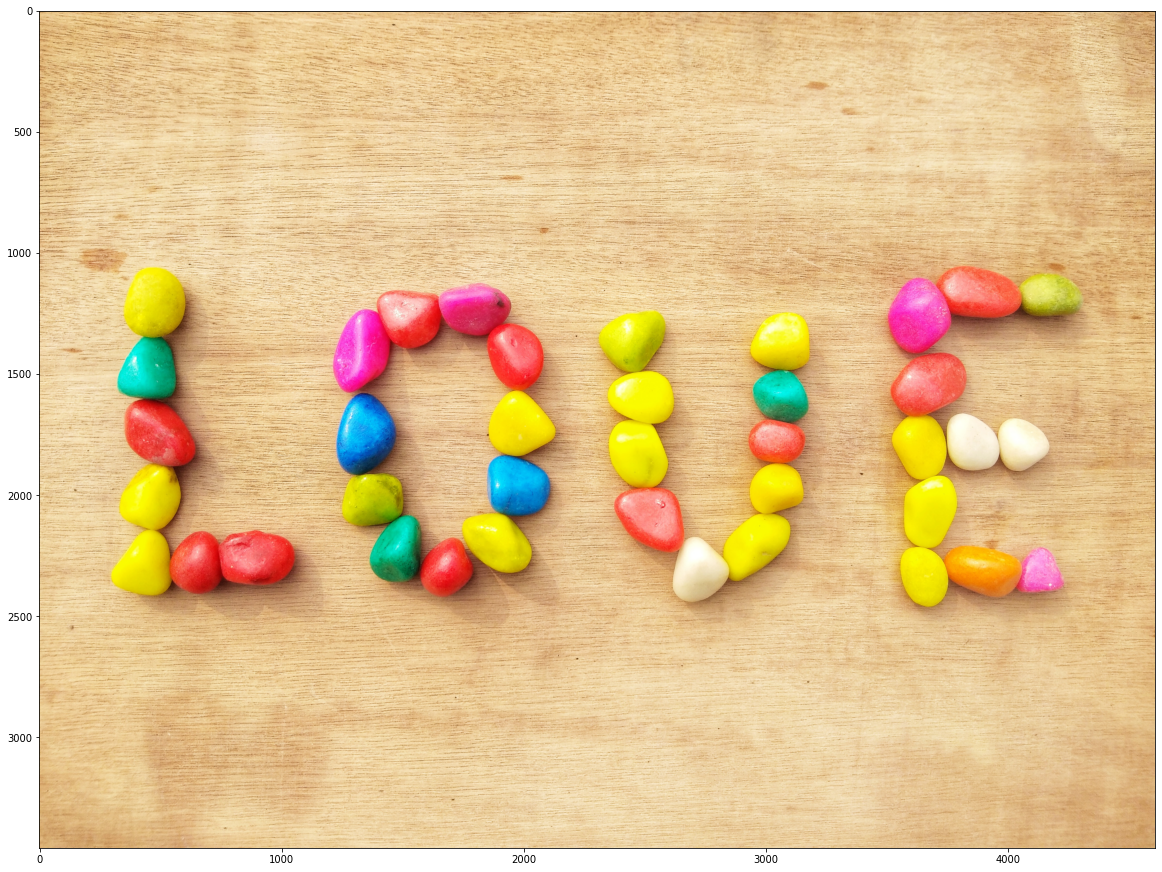

In [3]:
plt.subplots(figsize=(20,20))
plt.imshow(cimage)

In [3]:
from scipy import ndimage
import cv2

In [4]:
cimage.shape[2]

3

In [5]:
cl=color.rgb2lab(cimage)
x,y,z=cl.shape
plot=cimage.reshape(x*y,3)
col_map=plot.astype(np.float)/256

In [7]:
sx=[]
sy=[]
for i in range(x):
    for j in range(y):
        L_val = cl[i,j][0] 
        A_val = cl[i,j][1] 
        B_val = cl[i,j][2]
        sx.append(A_val)
        sy.append(B_val) 

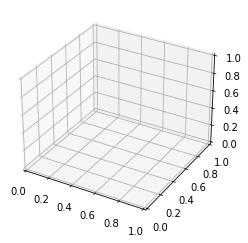

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors     
r, g, b = cv2.split(cimage)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

In [9]:
pix_col=cimage.reshape((np.shape(cimage)[0]*np.shape(cimage)[1],3))
norm=colors.Normalize(vmin=-1,vmax=1.)
norm.autoscale(pix_col)
pix_col=norm(pix_col).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pix_col, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [ ]:
def filter_color(lmin,amin,amax,bmin,bmax):
    f=np.copy(cimage)
    for i in range(x):
        for j in range(y):
            l_val = cl[i,j][0] 
            a_val = cl[i,j][1] 
            b_val = cl[i,j][2]
            if l_val>lmin and a_val>amin and a_val<amax and b_val>bmin and b_val<bmax:
                pass
            else:
                f[i,j]=[255,255,255]
    return f
l_img=color.rgb2lab(cimage)
yellow=filter_color(70,-50,0,30,100)
red = filter_color(30, 25, 100, 0, 100)
green = filter_color(50, -128, -20, 0, 50)
blue = filter_color(50,-40, 30, -128, -20)
white = filter_color(93, -25, 25, -25, 25)
pink = filter_color(50, 20,128,-50,0)


(-0.5, 4607.5, 3455.5, -0.5)

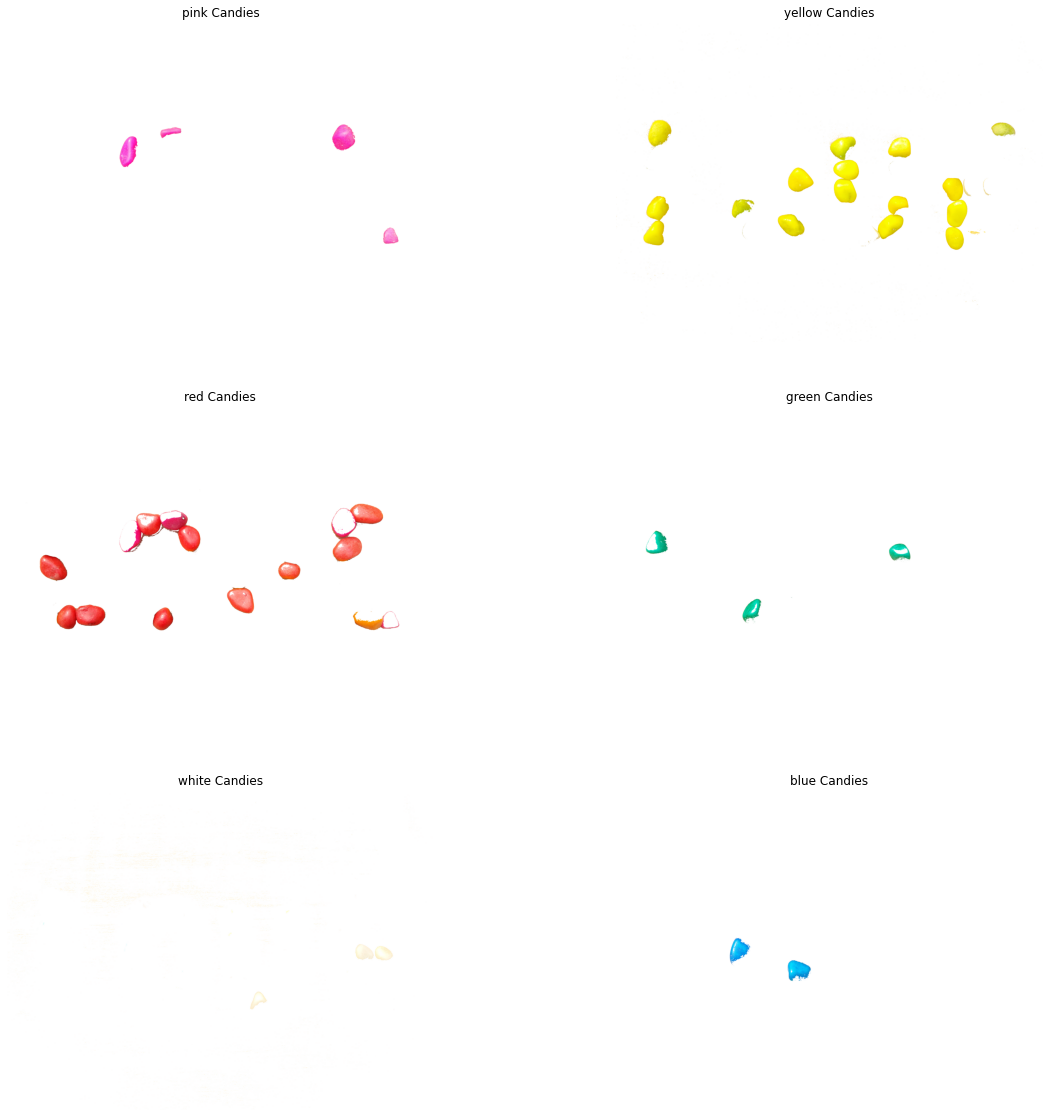

In [9]:

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
ax[0][0].imshow(pink)
ax[0][0].set_title("pink Candies")
ax[0][0].axis('off')

ax[0][1].imshow(yellow)
ax[0][1].set_title("yellow Candies")
ax[0][1].axis('off')

ax[1][0].imshow(red)
ax[1][0].set_title("red Candies")
ax[1][0].axis('off')

ax[1][1].imshow(green)
ax[1][1].set_title("green Candies")
ax[1][1].axis('off')

ax[2][0].imshow(white)
ax[2][0].set_title("white Candies")
ax[2][0].axis('off')

ax[2][1].imshow(blue)
ax[2][1].set_title("blue Candies")
ax[2][1].axis('off')

In [ ]:
gray = rgb2gray(cimage)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1],3)
for i in range(gray_r.shape[0]):
    if gray_r[i]>gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0  
gray=gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray,cmap='gray')